# Part I - Descriptive Statistics 

##  \*\* Data Overview \*\*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

data_path = '/home/joeannyen/Desktop/Joeann_workspace/WORK/test_technique/ProbaYes/V1/bike_data.csv'
bike_data = pd.read_csv(data_path, delimiter = ',')

- A quick glance at the data:

In [2]:
bike_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
641,2011-02-09 22:00:00,1,0,1,3,6.56,8.335,80,11.0014,46
5413,2011-12-19 15:00:00,4,0,1,1,15.58,19.695,46,11.0014,159
1933,2011-05-07 11:00:00,2,0,0,1,22.96,26.515,43,0.0000,347
10725,2012-12-13 07:00:00,4,0,1,1,9.84,11.365,60,15.0013,385
10696,2012-12-12 02:00:00,4,0,1,1,11.48,13.635,56,11.0014,9


- We can see that there's no empty cols:

In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 850.5+ KB


- We also note that the maximum value of __count__ is 977, which is far from the 50th & 75th percentiles (145 & 284):

In [4]:
bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


- So we'd like to observe its distribution, from which we notice that it's skew:
    - in feature engineering part we'll deal with this problem

[Text(0.5, 0, 'count'), Text(0.5, 1.0, 'Distribution of count')]

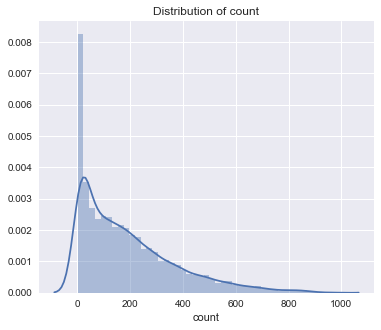

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(6,5)
sns.distplot(bike_data['count'])
ax.set(xlabel='count',title='Distribution of count')

- In order to get more information from __datetime__ we are going to extract __month__ & __hour__:

In [6]:
from datetime import datetime

def get_month(dt):
    date_str = dt.split()[0]
    date_dt = datetime.strptime(date_str, '%Y-%m-%d')
    month = date_dt.month
    return month
bike_data['month']=bike_data.datetime.apply(get_month)

def get_hour(dt):
    hour_str = dt.split()[1].split(':')[0]
    hour = int(hour_str)
    return hour
bike_data['hour']=bike_data.datetime.apply(get_hour)

bike_data.drop('datetime',axis=1,inplace=True)

# A quick glance at the result
bike_data.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,hour
6160,1,0,0,1,5.74,7.575,43,11.0014,28,2,22
2109,2,0,0,3,22.14,25.760,94,8.9981,248,5,19
2678,2,0,0,2,30.34,34.090,55,6.0032,396,6,12
8510,3,0,0,1,29.52,34.850,79,8.9981,91,7,23
8495,3,0,0,2,28.70,33.335,84,8.9981,133,7,8


## \*\* Data Visualization \*\*

### Continuous Data: Scatter Plots

- A first glance at the continuous data, <b>temp</b>, <b>atemp</b>, <b>windspeed</b> and <b>humidity</b>:
    - Distributions of <b>temp</b> & <b>atemp</b> look a lot alike
    - Lots of 0s in <b>windspeed</b> (a.k.a. outliers) that need to be processed
    - More details needed to get more insights and will be presented in the correlation matrix later on

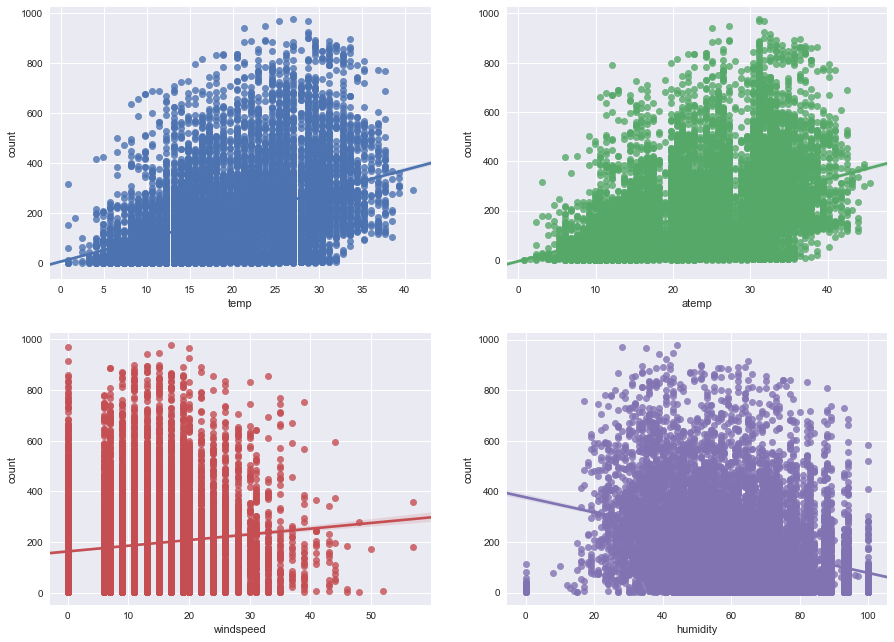

In [7]:
fig1, axes1 = plt.subplots(nrows=2,ncols=2)
fig1.set_size_inches(15, 11)

sns.regplot(x='temp', y='count', data=bike_data, ax=axes1[0][0])
sns.regplot(x='atemp', y='count', data=bike_data, ax=axes1[0][1])
sns.regplot(x='windspeed', y='count', data=bike_data, ax=axes1[1][0])
sns.regplot(x='humidity', y='count', data=bike_data, ax=axes1[1][1])

- Dealing with 0s in __windspeed__ by RandomForestRegressor; result shown below:

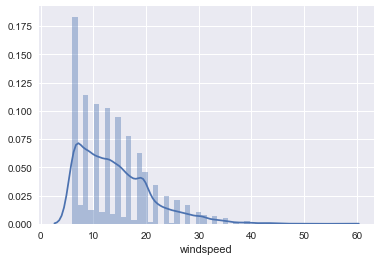

In [8]:
from sklearn.ensemble import RandomForestRegressor

wind_non_zero = bike_data[bike_data['windspeed']!=0]
wind_zero = bike_data[bike_data['windspeed']==0]
RFR_wind = RandomForestRegressor(n_estimators=1000,random_state=42)
wind_col = ['season', 'weather', 'humidity', 'month', 'temp', 'hour', 'atemp']
RFR_wind.fit(wind_non_zero[wind_col], wind_non_zero['windspeed'])
wind_zero_vals = RFR_wind.predict(X=wind_zero[wind_col])
wind_zero['windspeed'] = wind_zero_vals
bike_data = wind_non_zero.append(wind_zero)
bike_data.reset_index(inplace=True)
bike_data.drop('index',inplace=True,axis=1)
sns.distplot(bike_data.windspeed)

### Continuous Data: Pearson Correlation Matrix

- __temp__ and __atemp__ are strongly correlated: r = 0.98 -> should only choose one to avoid multicollinearity
- __windspeed__ and __humidity__ are slightly correlated: r = -0.34
- The correlation between __windspeed__ and __count__ is very weak: r = 0.11
- __humidity__, __temp__ and __atemp__ are relatively correlated to __count__ (r = 0.39, 0.39, -0.32)

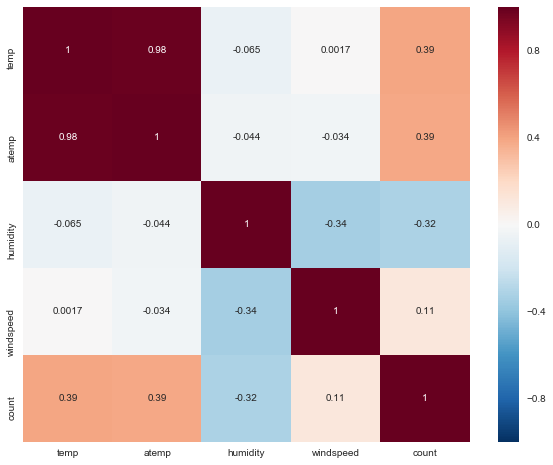

In [9]:
corr_data = bike_data[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig2, axes2 = plt.subplots(figsize=(10,8))

sns.heatmap(corr_data,
            annot=True,
            xticklabels=corr_data.columns.values,
            yticklabels=corr_data.columns.values,
            ax=axes2)

### Categorical Data: Bar plots 

- Intuitively, __holiday/workingday__ are repeated variables and should only choose one
    - given that there are less outliers in __workingday__ cols, I lean on this one;
    - in the later part I'll compare average counts on workingdays and non-workingdays;
- It seems that in spring people rent less bikes than in other seasons
- Bad weathers seems to play in the game
- From June to October, the average counts are high
- 8am, 5pm and 6pm seem to be very busy

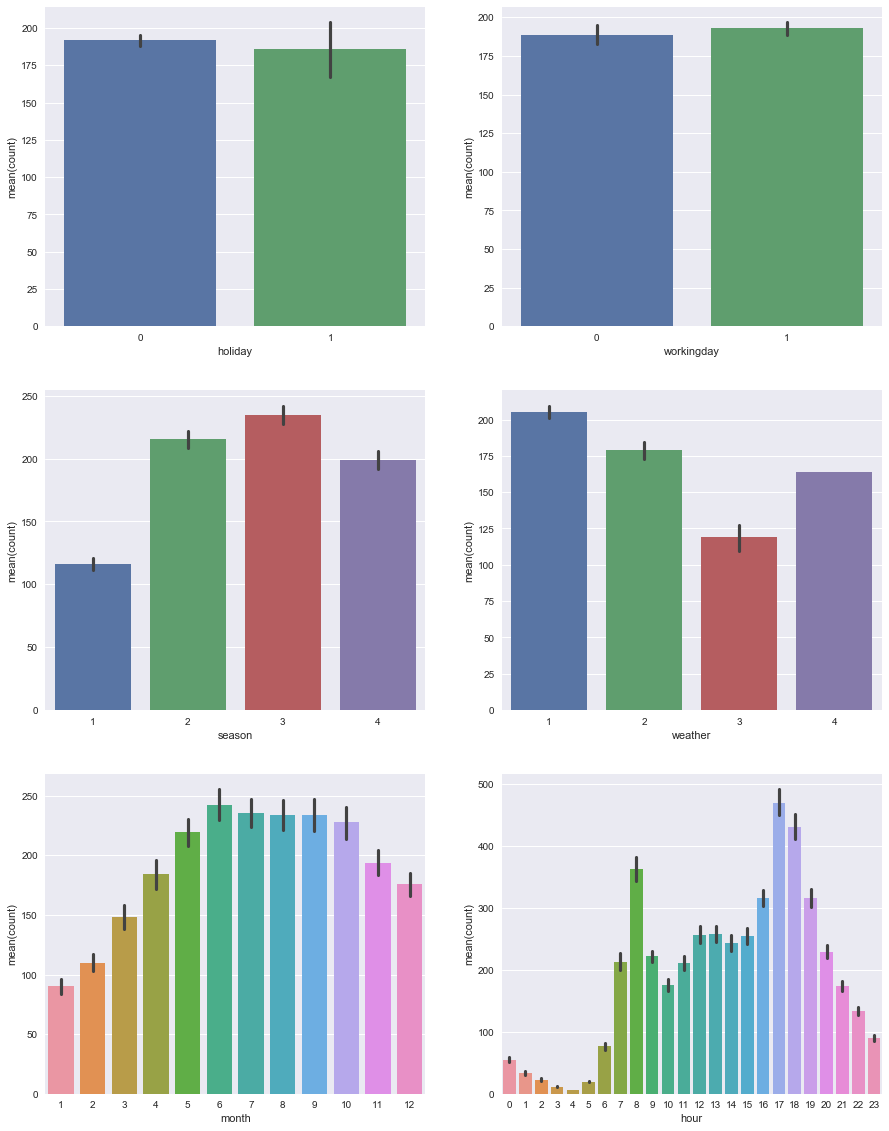

In [10]:
fig3, axes3 = plt.subplots(nrows=3,ncols=2)
fig3.set_size_inches(15, 20)

sns.barplot(x='holiday', y='count', data=bike_data, ax=axes3[0][0])
sns.barplot(x='workingday', y='count', data=bike_data, ax=axes3[0][1])
sns.barplot(x='season', y='count', data=bike_data, ax=axes3[1][0])
sns.barplot(x='weather', y='count', data=bike_data, ax=axes3[1][1])
sns.barplot(x='month', y='count', data=bike_data, ax=axes3[2][0])
sns.barplot(x='hour', y='count', data=bike_data, ax=axes3[2][1])

- A closer look at average numbers of count on workingdays and non-workingdays respectively:
    - on workingdays, we note a peak at 8am and 5pm, probably due to commuters;
    - on non-workingdays, 12-13 pm are pretty busy;
    - whereas off-peak hours situate pretty much at the same period for both of the two days.

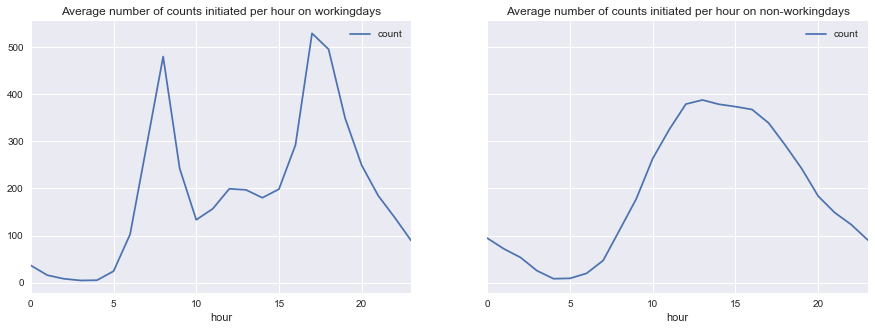

In [11]:
fig4, axes4 = plt.subplots(1, 2,sharey = True)

workingday_df = bike_data[bike_data['workingday']==1]
workingday_df = workingday_df.groupby(['hour'], as_index=True).agg({'count':'mean'})
workingday_df.plot(figsize=(15,5),title = 'Average number of counts initiated per hour on workingdays',ax=axes4[0])

nworkingday_df = bike_data[bike_data['workingday']==0]
nworkingday_df = nworkingday_df.groupby(['hour'], as_index=True).agg({'count':'mean'})
nworkingday_df.plot(figsize=(15,5),title = 'Average number of counts initiated per hour on non-workingdays',ax=axes4[1])

- Let's get a closer look at __hmuidity__:
    - We note that as __humidity__ gets higher, __count__ goes down;
    - __humidity__ is high on May, September and October;
    - __humidity__ goes up as season/weather changes (peaks in winter and in bad weathers)

([<matplotlib.axis.XTick at 0x7f42a0c456d8>,
 <a list of 4 Text xticklabel objects>)

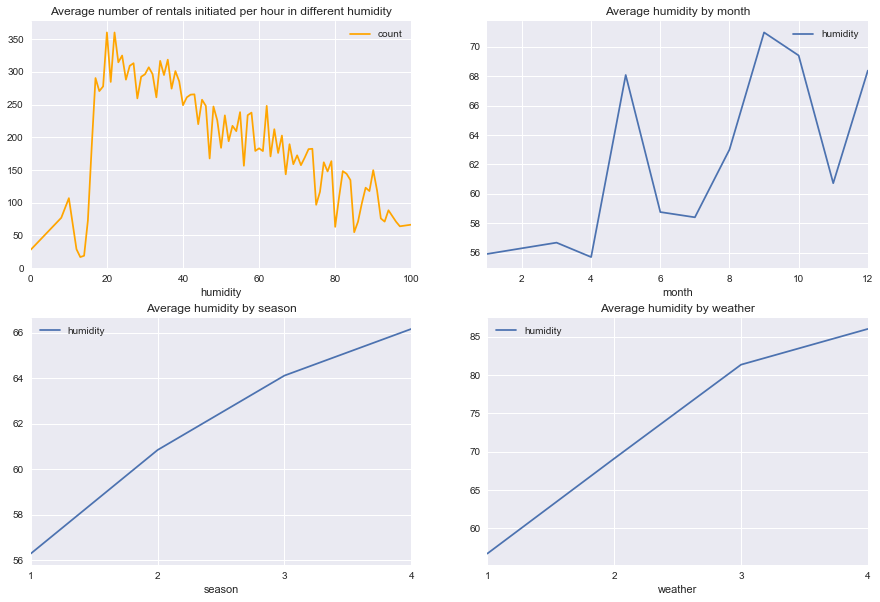

In [12]:
fig5, axes5 = plt.subplots(nrows=2,ncols=2)
fig5.set_size_inches(15,10)

humidity_count = bike_data.groupby(['humidity'], as_index=True).agg({'count':'mean'})
humidity_count.plot(title = 'Average number of rentals initiated per hour in different humidity', color='orange', ax=axes5[0][0])
humidity_month = bike_data.groupby(['month'], as_index=True).agg({'humidity':'mean'})
humidity_month.plot(title = 'Average humidity by month',ax=axes5[0][1])
humidity_season = bike_data.groupby(['season'], as_index=True).agg({'humidity':'mean'})
humidity_season.plot(title = 'Average humidity by season', xticks=[1,2,3,4], ax=axes5[1][0])
humidity_weather = bike_data.groupby(['weather'], as_index=True).agg({'humidity':'mean'})
humidity_weather.plot(title = 'Average humidity by weather', xticks=[1,2,3,4], ax=axes5[1][1])
plt.xticks([1,2,3,4])

- Intuitively, __month__ and __season__ must be correlated, and thus should only choose one in order to avoid multicollinearity problem;
- To prove this assumption, we'd like to observe the the contributions to the chi^2 statistic for their independence:
    - we see clearly that season 1 is stronly correlated to Jan, Feb, March; 2 to April, May, June and so on;
    - thus we will drop __season__ from our feature list.

In [13]:
import statsmodels.api as sm

table = sm.stats.Table.from_data(bike_data[['month', 'season']])
table.chi2_contribs

season,1,2,3,4
month,,,,
1,2028.204607,221.435038,221.435038,221.516247
2,2067.295828,225.702936,225.702936,225.785704
3,2067.295828,225.702936,225.702936,225.785704
4,223.786813,2026.470743,227.711359,227.794860
5,224.527048,2033.173489,228.464518,228.548294
6,224.527048,2033.173489,228.464518,228.548294
7,224.527048,228.464518,2033.173489,228.548294
8,224.527048,228.464518,2033.173489,228.548294
9,223.786813,227.711359,2026.470743,227.794860


# Part II - Machine Learning

- I choose _Random Forest Regressor_ to build my model

## \*\* Feature Engineering \*\*

- One-hot encoding for categorical data(__weather__):

In [14]:
weather_dummies = pd.get_dummies(bike_data['weather'],prefix='weather')
bike_data=pd.concat([bike_data, weather_dummies], axis=1)

- For cyclical features (__month__ & __hour__), we take their sin & cos values so that the distance between two points corresponds to the difference in time as we expect from a 24-hour cycle:

In [15]:
import numpy as np
from math import pi

bike_data['hr_sin'] = np.sin(bike_data.hour*(2.*np.pi/24))
bike_data['hr_cos'] = np.cos(bike_data.hour*(2.*np.pi/24))
bike_data['month_sin'] = np.sin((bike_data.month-1)*(2.*np.pi/12))
bike_data['month_cos'] = np.cos((bike_data.month-1)*(2.*np.pi/12))

- For __count__, first we rule out outliers that are not in the scope of its STD:
    - the distribution is still skew

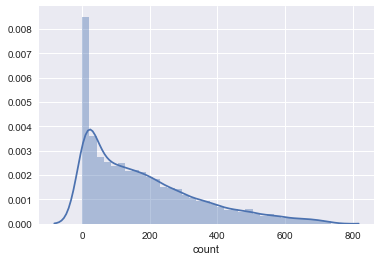

In [20]:
bike_data = bike_data[np.abs(bike_data["count"]-bike_data["count"].mean())<=(3*bike_data["count"].std())] 
count_outliers_free = bike_data['count']
sns.distplot(count_outliers_free)

- Then we take its log values:
    - now the distribution is closer to standard distribution

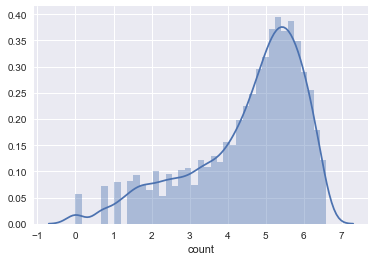

In [21]:
X = bike_data
y = bike_data['count']
y_log = np.log(y)
sns.distplot(y_log)

##  \*\* Model Training \*\* 

- Split the data into train set and test set & print out their shapes to make sure everything is good:

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (8591, 19)
Training Labels Shape: (8591,)
Testing Features Shape: (2148, 19)
Testing Labels Shape: (2148,)


- Chosen features are: __temp__, __workingday__, __humidity__, __weather__, __month__ and __hour__;
- So we drop the unwanted features and train our model:

In [23]:
drop_features = ['windspeed', 'atemp', 'season', 'weather', 'holiday', 'month', 'hour', 'count']
X_train = X_train.drop(drop_features, axis=1)
X_test = X_test.drop(drop_features, axis=1)

RFR = RandomForestRegressor(n_estimators=1000, random_state=42)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

- Predictions:

In [24]:
y_train_pred =  RFR.predict(X_train)
y_test_pred = RFR.predict(X_test)

- Root Mean Square Log Error(RMSE) is the accuracy criteria for this problem: 

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))

RMSLE train: 0.060
RMSLE test: 0.131
R2 train: 0.986
R2 test: 0.907
